In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize

We study the energy eigenvalues and eigenstates of a potential well of width $2a$ and depth $V_0$ simmetrically placed around the origin. We compare the results in two cases:
* Infinite domain
* System placed in a box of width $2L$

# Solution in the infinite domain

In this case the system has both bound and unbound solutions. We mainly follow the notation of the book of Gasiorowicz.

In [219]:
V0 = 500
a = 0.5

## Bound state solutions

Outside the potential domain solutions have an exponential behaviour:
$$
\psi(x) = C_1e^{-\mu x} \;\; x > a \quad \psi(x) = C_2e^{\mu x} \;\; x < -a
$$
and $E=-\frac{\mu^2}{2}$. Inside the region of the potential the behavious is oscillatory and it is useful to use the parity symmetry of the potential to separe the solutions in even and odd.

### Even solutions

In this case we have that $\psi(x) = Acos(kx)$ for $|x|<a$. The matching conditions of the wave functions and its derivative at the junction points impose the conditions $\mu= k tan(ka)$. We introduce the auxiliary variables $z=ka$ and $z_0 = \sqrt{2V_0}a^2$ and rewrite the previous condition as (we use the fact that $k^2+\mu^2 = 2V_0)$:
$$
\sqrt{\left(\frac{z_0}{z}\right)^2-1} = tan(z)
$$
and we solve this equation for $z$ (in the range $(0,z_0]$). Once that the solutions are provided we have:
$$
k = \frac{z}{a} \;\;, \mu = \frac{z}{a}tan(z) \;\;, E = -\frac{1}{2}\left(\frac{z}{a}tan(z)\right)^2
$$
Furthermore we have $C_1=C_2=C$ and:
$$
A = \frac{Ce^{-ztan(z)}}{cos(z)}
$$
and $C$ is determined by the normalization condition of the wave function.

In [220]:
z0 = np.sqrt(2*V0)*a
print('z0 = ',z0)

z0 =  15.811388300841896


In [221]:
z = np.linspace(1e-4,z0,1000)

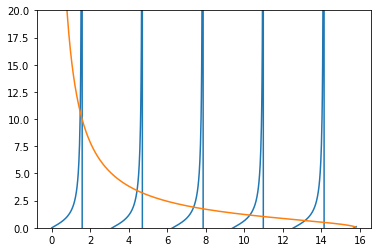

In [222]:
plt.plot(z,np.tan(z))
plt.plot(z,np.sqrt((z0/z)**2-1))
plt.ylim([0,20])
plt.show()

In [223]:
f_sym = lambda x: np.tan(x) - np.sqrt((z0/x)**2-1)

In [224]:
s = np.sign(f_sym(z))

In [225]:
z_zeroes = []
for i in range(len(s)-1):
    if s[i]+s[i+1] == 0:
        zero = optimize.brentq(f_sym, z[i], z[i+1])
        z_zeroes.append(zero)
# cut the spurious solutions
z_zeroes = [z_zeroes[i] for i in range(0,len(z_zeroes),2)]
#z_zeroes

Bound (even) energy levels:

In [226]:
Energy_e = [-0.5*(val/a*np.tan(val))**2 for val in z_zeroes]
print('Number of bound states = ',len(Energy_e))
for i,e in enumerate(Energy_e):
    print('E'+str(i)+' = ',e)

Number of bound states =  6
E0 =  -495.6355739281896
E1 =  -460.7766345332049
E2 =  -391.3914606763265
E3 =  -288.34801385072495
E4 =  -153.91686909426528
E5 =  -2.2720098493715524


Calculation of the wave functions

In [227]:
k_e = [val/a for val in z_zeroes]
mu_e = [val/a*np.tan(val) for val in z_zeroes]
C_e = [1 for val in z_zeroes]
C_e = []
for val in z_zeroes:
    num = np.exp(2*val*np.tan(val))
    den = a*(1.0/(np.cos(val)**2)+np.sin(val)/(val*np.cos(val))+1.0/(val*np.tan(val)))
    C_e.append(np.sqrt(num/den))
A_e = [] 
for i,val in enumerate(z_zeroes):
    A_e.append(C_e[i]*np.exp(-val*np.tan(val))/np.cos(val))

In [228]:
x = np.linspace(-2*a,2*a,1000)

In [229]:
def psi_e(i,x):
    out = 0.0
    if x <= -a: out = C_e[i]*np.exp(mu_e[i]*x)
    if x > -a and x <= a: out =  A_e[i]*np.cos(k_e[i]*x)
    if x > a: out = C_e[i]*np.exp(-mu_e[i]*x)
    return out

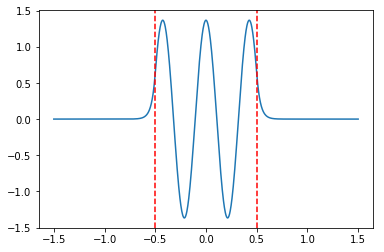

In [267]:
nstate = 2
psival = [psi_e(nstate,val) for val in x]
plt.plot(x,psival)
plt.axvline(x=-a, color='r', linestyle='--')
plt.axvline(x=a, color='r', linestyle='--')

Numerical check of the normalization of the wavefunction

In [231]:
inte = 0.0
dx = x[1]-x[0]
for p in psival:
    inte += p**2
inte = inte*dx
print(inte)

1.0000000041227526


## Unbound state solutions

We build the unbound solution obtained for $E>0$.

### Even solutions

We look for solutions of the form:
$$
\psi(x) = A cos(qx) \;\; |x| > a \;,\quad \psi(x) = B cos(kx) \;\; |x| < a
$$
The Schroedinger equation imposes that:
$$
\frac{q^2}{2} = E = \frac{k^2}{2} - V_0
$$
We can parametrize the solution in function of $E$ so that:
$$
q = \sqrt{2E} \;\;, \quad k = \sqrt{2(E+V_0)} 
$$

The matching conditions of the wave functions and its derivative at the junction points impose that:
$$
B = A \frac{cos(qa)}{cos(ka)} \;\;, \quad q tan(qa) = k tan(ka)
$$

In [268]:
# A = 1
def q(E): return np.sqrt(2*E)

def k(E): return np.sqrt(2*(E+V0))

def B(E): return np.cos(q(E)*a)/np.cos(k(E)*a)

def psi_ue(E,x):
    out = 0.0
    if x <= -a: out = np.cos(q(E)*x)
    if x > -a and x <= a: out =  B(E)*np.cos(k(E)*x)
    if x > a: out = np.cos(q(E)*x)
    return out

In [269]:
psi_ue(1,1)

0.15594369476537437

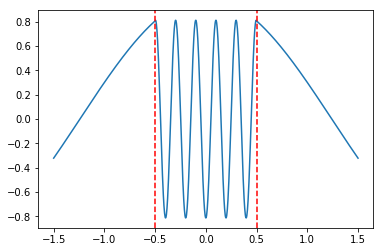

In [270]:
x = np.linspace(-3*a,3*a,1000)
Eval = 0.8
psival = [psi_ue(Eval,val) for val in x]
plt.plot(x,psival)
plt.axvline(x=-a, color='r', linestyle='--')
plt.axvline(x=a, color='r', linestyle='--')

There is a problem with the continuity of the derivative....maybe it is not meaningfull to look for real wave function in this case....

In [165]:
from sympy import *

In [166]:
x = Symbol('x')
a = Symbol('a')
k = Symbol('k')

In [167]:
y = cos(x)**2

In [168]:
integrate(y,x)

x/2 + sin(x)*cos(x)/2